<a href="https://colab.research.google.com/github/jacksonguedes/PDS/blob/main/Projeto_de_Filtro_FIR_PDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np

from scipy.io import wavfile
from scipy.signal import firwin, lfilter

# Aplicando a FFT ao arquivo de áudio

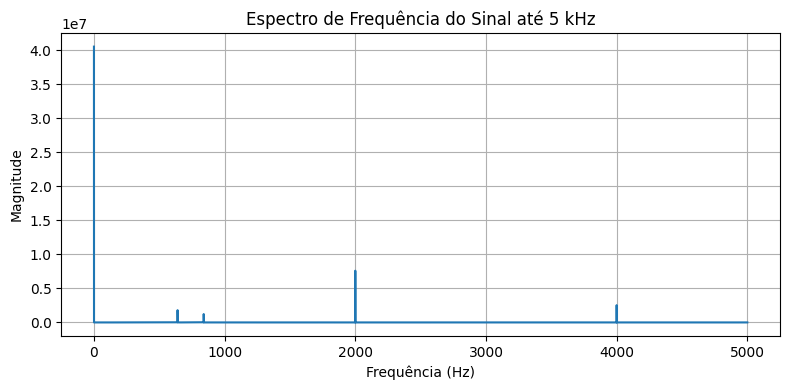

In [2]:
# 1. Carregar o arquivo de áudio .wav
sample_rate, signal = wavfile.read('sinal_1.wav')

# 2. Aplicar a FFT para identificar as componentes de frequência
N = len(signal)
frequencies = np.fft.fftfreq(N, 1/sample_rate)
fft_result = np.fft.fft(signal)

# Filtrar as frequências até 5 kHz
freq_limit = 5000  # 5 kHz
frequencies_positive = frequencies[:N//2]
fft_frequencies_positive = np.abs(fft_result[:N//2])
indices = frequencies_positive <= freq_limit

# Plotar o espectro de frequência para identificar componentes
plt.figure(figsize=(8, 4))
plt.plot(frequencies_positive[indices], fft_frequencies_positive[indices])
plt.title('Espectro de Frequência do Sinal até 5 kHz')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.tight_layout()
plt.show()

# Criação dos filtros com três janelas diferentes, ganho linear e ganho em dB.

## Filtro 640 Hz

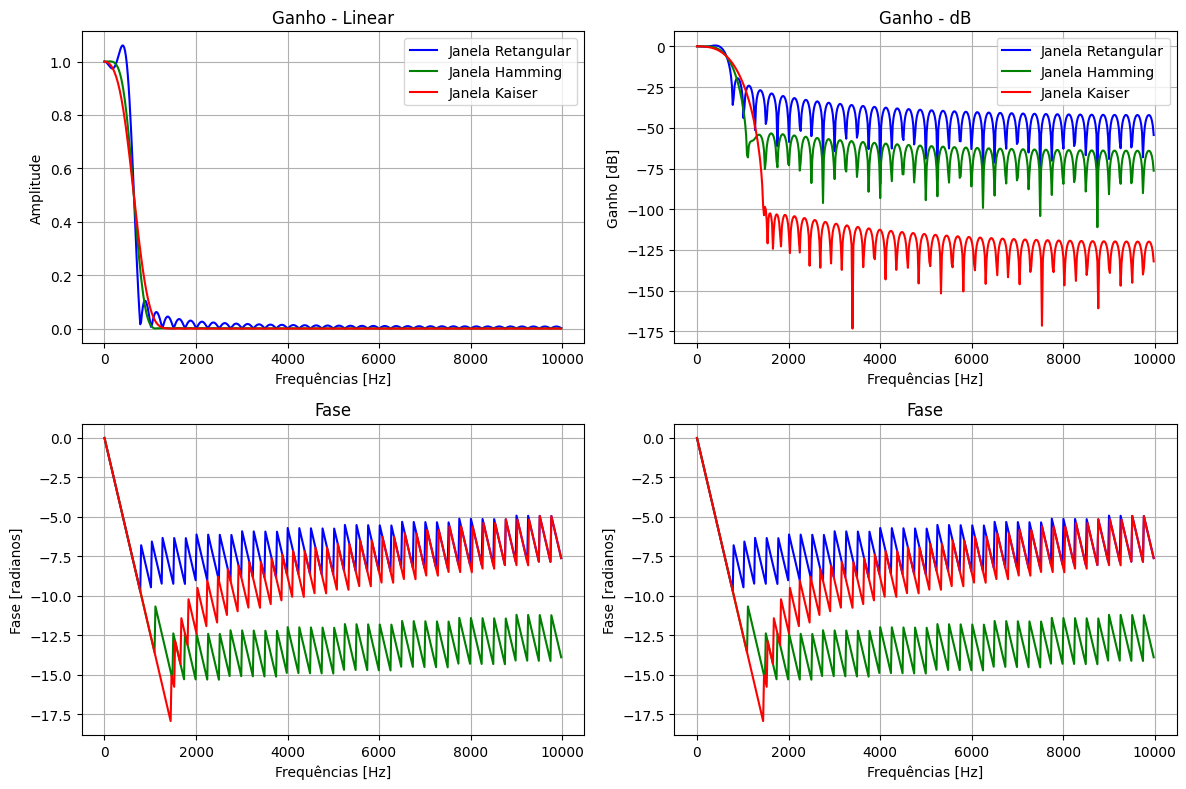

In [5]:
# Parâmetros
numtaps = 80  # Número de coeficientes (tamanho do filtro)
fs = 20000  # Frequência de amostragem
cutoff = 640 / (fs / 2)  # Frequência de corte normalizada (640 Hz)

# Filtro FIR com janela retangular (boxcar)
a1 = signal.firwin(numtaps, cutoff, window='boxcar', pass_zero=True)
w, h1 = signal.freqz(a1)

# Filtro FIR com janela de Hamming
a2 = signal.firwin(numtaps, cutoff, window='hamming', pass_zero=True)
w, h2 = signal.freqz(a2)

# Filtro FIR com janela de Kaiser (beta = 8)
a3 = signal.firwin(numtaps, cutoff, window=('kaiser', 10), pass_zero=True)
w, h3 = signal.freqz(a3)

# Criação do gráfico com subplots para ganho linear e fase (lado esquerdo)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico de ganho (linear)
axs[0, 0].plot(w * fs / (2 * np.pi), abs(h1), 'b', label='Janela Retangular')
axs[0, 0].plot(w * fs / (2 * np.pi), abs(h2), 'g', label='Janela Hamming')
axs[0, 0].plot(w * fs / (2 * np.pi), abs(h3), 'r', label='Janela Kaiser')
axs[0, 0].set_title('Ganho - Linear')
axs[0, 0].set_ylabel('Amplitude')
axs[0, 0].set_xlabel('Frequências [Hz]')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Gráfico de fase (abaixo do gráfico linear)
axs[1, 0].plot(w * fs / (2 * np.pi), np.unwrap(np.angle(h1)), 'b', label='Janela Retangular')
axs[1, 0].plot(w * fs / (2 * np.pi), np.unwrap(np.angle(h2)), 'g', label='Janela Hamming')
axs[1, 0].plot(w * fs / (2 * np.pi), np.unwrap(np.angle(h3)), 'r', label='Janela Kaiser')
axs[1, 0].set_title('Fase')
axs[1, 0].set_ylabel('Fase [radianos]')
axs[1, 0].set_xlabel('Frequências [Hz]')
axs[1, 0].grid(True)

# Criação do gráfico com subplots para ganho em dB e fase (lado direito)
# Gráfico de ganho (em dB)
axs[0, 1].plot(w * fs / (2 * np.pi), 20 * np.log10(abs(h1)), 'b', label='Janela Retangular')
axs[0, 1].plot(w * fs / (2 * np.pi), 20 * np.log10(abs(h2)), 'g', label='Janela Hamming')
axs[0, 1].plot(w * fs / (2 * np.pi), 20 * np.log10(abs(h3)), 'r', label='Janela Kaiser')
axs[0, 1].set_title('Ganho - dB')
axs[0, 1].set_ylabel('Ganho [dB]')
axs[0, 1].set_xlabel('Frequências [Hz]')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Gráfico de fase (abaixo do gráfico em dB)
axs[1, 1].plot(w * fs / (2 * np.pi), np.unwrap(np.angle(h1)), 'b', label='Janela Retangular')
axs[1, 1].plot(w * fs / (2 * np.pi), np.unwrap(np.angle(h2)), 'g', label='Janela Hamming')
axs[1, 1].plot(w * fs / (2 * np.pi), np.unwrap(np.angle(h3)), 'r', label='Janela Kaiser')
axs[1, 1].set_title('Fase')
axs[1, 1].set_ylabel('Fase [radianos]')
axs[1, 1].set_xlabel('Frequências [Hz]')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


## Filtro 840 Hz

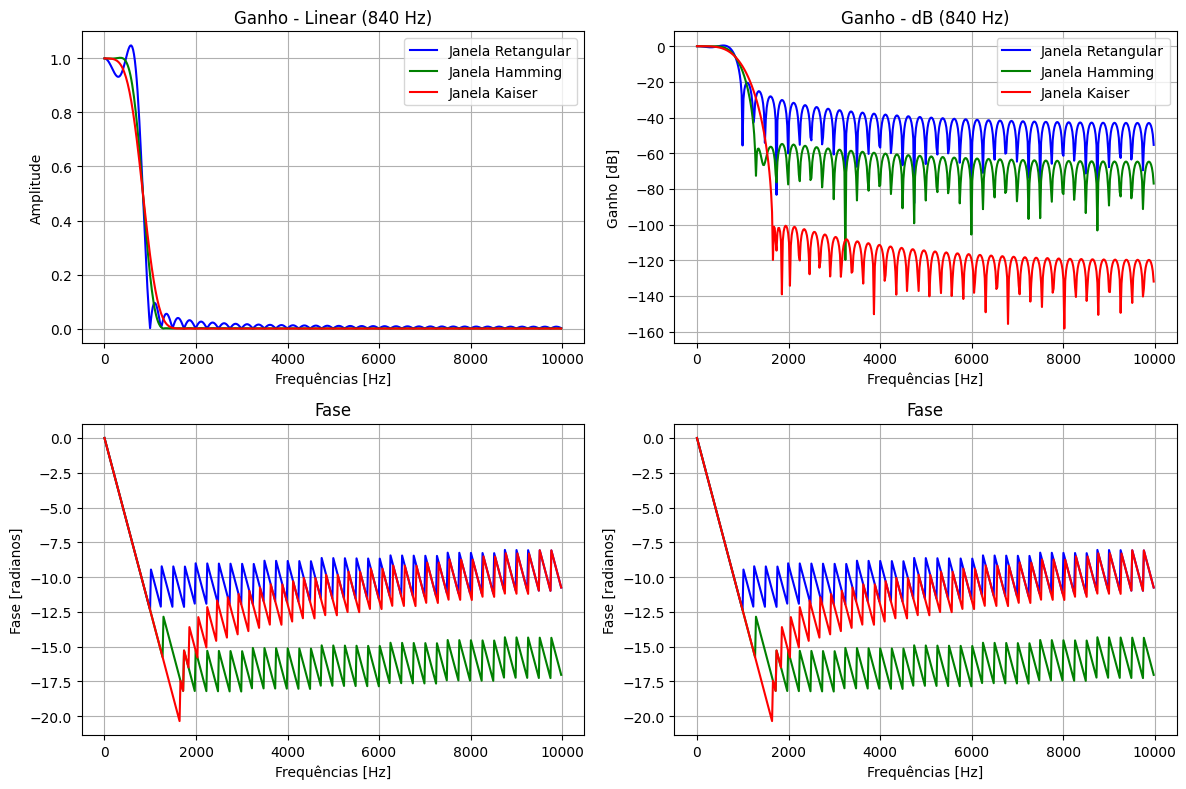

In [7]:
# Parâmetros
numtaps = 80  # Número de coeficientes (tamanho do filtro)
fs = 20000  # Frequência de amostragem
cutoff = 840 / (fs / 2)  # Frequência de corte normalizada (840 Hz)

# Filtro FIR com janela retangular (boxcar)
a1 = signal.firwin(numtaps, cutoff, window='boxcar', pass_zero=True)
w, h1 = signal.freqz(a1)

# Filtro FIR com janela de Hamming
a2 = signal.firwin(numtaps, cutoff, window='hamming', pass_zero=True)
w, h2 = signal.freqz(a2)

# Filtro FIR com janela de Kaiser (beta = 8)
a3 = signal.firwin(numtaps, cutoff, window=('kaiser', 10), pass_zero=True)
w, h3 = signal.freqz(a3)

# Criação do gráfico com subplots para ganho linear e fase (lado esquerdo)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico de ganho (linear)
axs[0, 0].plot(w * fs / (2 * np.pi), abs(h1), 'b', label='Janela Retangular')
axs[0, 0].plot(w * fs / (2 * np.pi), abs(h2), 'g', label='Janela Hamming')
axs[0, 0].plot(w * fs / (2 * np.pi), abs(h3), 'r', label='Janela Kaiser')
axs[0, 0].set_title('Ganho - Linear (840 Hz)')
axs[0, 0].set_ylabel('Amplitude')
axs[0, 0].set_xlabel('Frequências [Hz]')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Gráfico de fase (abaixo do gráfico linear)
axs[1, 0].plot(w * fs / (2 * np.pi), np.unwrap(np.angle(h1)), 'b', label='Janela Retangular')
axs[1, 0].plot(w * fs / (2 * np.pi), np.unwrap(np.angle(h2)), 'g', label='Janela Hamming')
axs[1, 0].plot(w * fs / (2 * np.pi), np.unwrap(np.angle(h3)), 'r', label='Janela Kaiser')
axs[1, 0].set_title('Fase')
axs[1, 0].set_ylabel('Fase [radianos]')
axs[1, 0].set_xlabel('Frequências [Hz]')
axs[1, 0].grid(True)

# Criação do gráfico com subplots para ganho em dB e fase (lado direito)
# Gráfico de ganho (em dB)
axs[0, 1].plot(w * fs / (2 * np.pi), 20 * np.log10(abs(h1)), 'b', label='Janela Retangular')
axs[0, 1].plot(w * fs / (2 * np.pi), 20 * np.log10(abs(h2)), 'g', label='Janela Hamming')
axs[0, 1].plot(w * fs / (2 * np.pi), 20 * np.log10(abs(h3)), 'r', label='Janela Kaiser')
axs[0, 1].set_title('Ganho - dB (840 Hz)')
axs[0, 1].set_ylabel('Ganho [dB]')
axs[0, 1].set_xlabel('Frequências [Hz]')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Gráfico de fase (abaixo do gráfico em dB)
axs[1, 1].plot(w * fs / (2 * np.pi), np.unwrap(np.angle(h1)), 'b', label='Janela Retangular')
axs[1, 1].plot(w * fs / (2 * np.pi), np.unwrap(np.angle(h2)), 'g', label='Janela Hamming')
axs[1, 1].plot(w * fs / (2 * np.pi), np.unwrap(np.angle(h3)), 'r', label='Janela Kaiser')
axs[1, 1].set_title('Fase')
axs[1, 1].set_ylabel('Fase [radianos]')
axs[1, 1].set_xlabel('Frequências [Hz]')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


## Filtro 2kHz

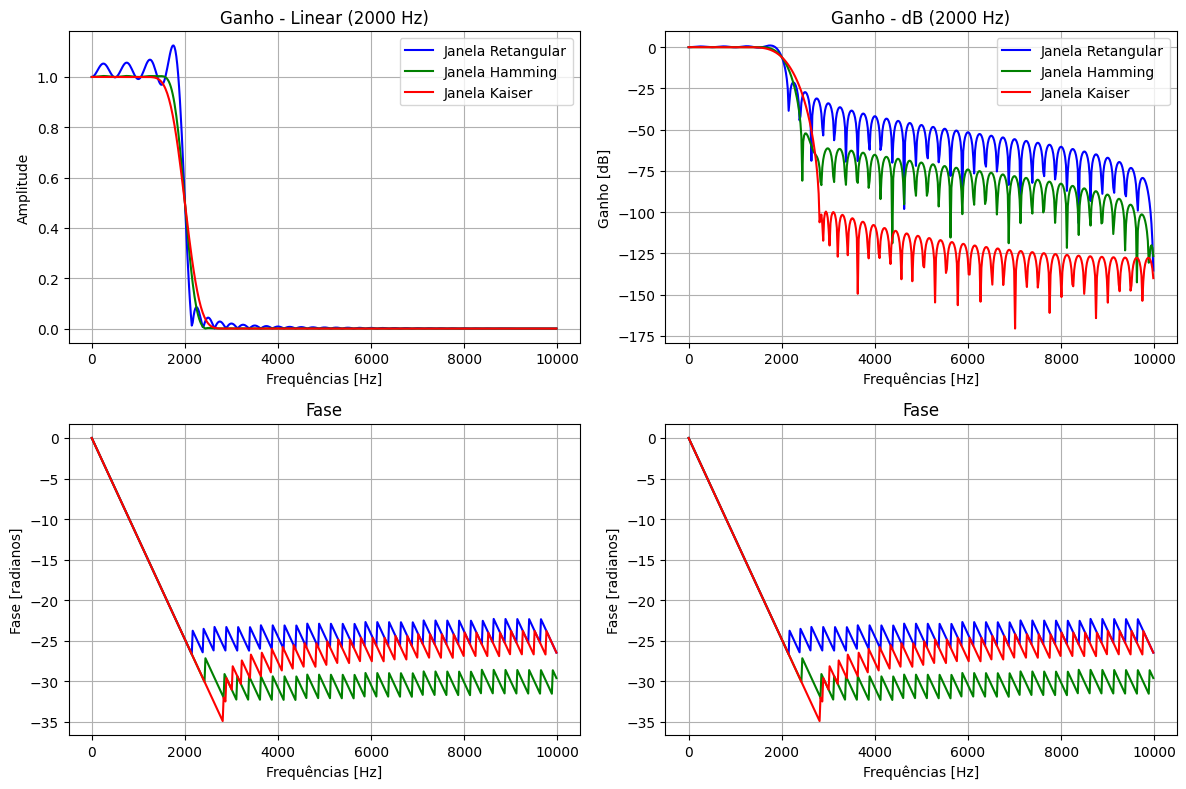

In [9]:
# Parâmetros
numtaps = 80  # Número de coeficientes (tamanho do filtro)
fs = 20000  # Frequência de amostragem
cutoff = 2000 / (fs / 2)  # Frequência de corte normalizada (2000 Hz)

# Filtro FIR com janela retangular (boxcar)
a1 = signal.firwin(numtaps, cutoff, window='boxcar', pass_zero=True)
w, h1 = signal.freqz(a1)

# Filtro FIR com janela de Hamming
a2 = signal.firwin(numtaps, cutoff, window='hamming', pass_zero=True)
w, h2 = signal.freqz(a2)

# Filtro FIR com janela de Kaiser (beta = 8)
a3 = signal.firwin(numtaps, cutoff, window=('kaiser', 10), pass_zero=True)
w, h3 = signal.freqz(a3)

# Criação do gráfico com subplots para ganho linear e fase (lado esquerdo)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico de ganho (linear)
axs[0, 0].plot(w * fs / (2 * np.pi), abs(h1), 'b', label='Janela Retangular')
axs[0, 0].plot(w * fs / (2 * np.pi), abs(h2), 'g', label='Janela Hamming')
axs[0, 0].plot(w * fs / (2 * np.pi), abs(h3), 'r', label='Janela Kaiser')
axs[0, 0].set_title('Ganho - Linear (2000 Hz)')
axs[0, 0].set_ylabel('Amplitude')
axs[0, 0].set_xlabel('Frequências [Hz]')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Gráfico de fase (abaixo do gráfico linear)
axs[1, 0].plot(w * fs / (2 * np.pi), np.unwrap(np.angle(h1)), 'b', label='Janela Retangular')
axs[1, 0].plot(w * fs / (2 * np.pi), np.unwrap(np.angle(h2)), 'g', label='Janela Hamming')
axs[1, 0].plot(w * fs / (2 * np.pi), np.unwrap(np.angle(h3)), 'r', label='Janela Kaiser')
axs[1, 0].set_title('Fase')
axs[1, 0].set_ylabel('Fase [radianos]')
axs[1, 0].set_xlabel('Frequências [Hz]')
axs[1, 0].grid(True)

# Criação do gráfico com subplots para ganho em dB e fase (lado direito)
# Gráfico de ganho (em dB)
axs[0, 1].plot(w * fs / (2 * np.pi), 20 * np.log10(abs(h1)), 'b', label='Janela Retangular')
axs[0, 1].plot(w * fs / (2 * np.pi), 20 * np.log10(abs(h2)), 'g', label='Janela Hamming')
axs[0, 1].plot(w * fs / (2 * np.pi), 20 * np.log10(abs(h3)), 'r', label='Janela Kaiser')
axs[0, 1].set_title('Ganho - dB (2000 Hz)')
axs[0, 1].set_ylabel('Ganho [dB]')
axs[0, 1].set_xlabel('Frequências [Hz]')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Gráfico de fase (abaixo do gráfico em dB)
axs[1, 1].plot(w * fs / (2 * np.pi), np.unwrap(np.angle(h1)), 'b', label='Janela Retangular')
axs[1, 1].plot(w * fs / (2 * np.pi), np.unwrap(np.angle(h2)), 'g', label='Janela Hamming')
axs[1, 1].plot(w * fs / (2 * np.pi), np.unwrap(np.angle(h3)), 'r', label='Janela Kaiser')
axs[1, 1].set_title('Fase')
axs[1, 1].set_ylabel('Fase [radianos]')
axs[1, 1].set_xlabel('Frequências [Hz]')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


## Filtro 4kHz

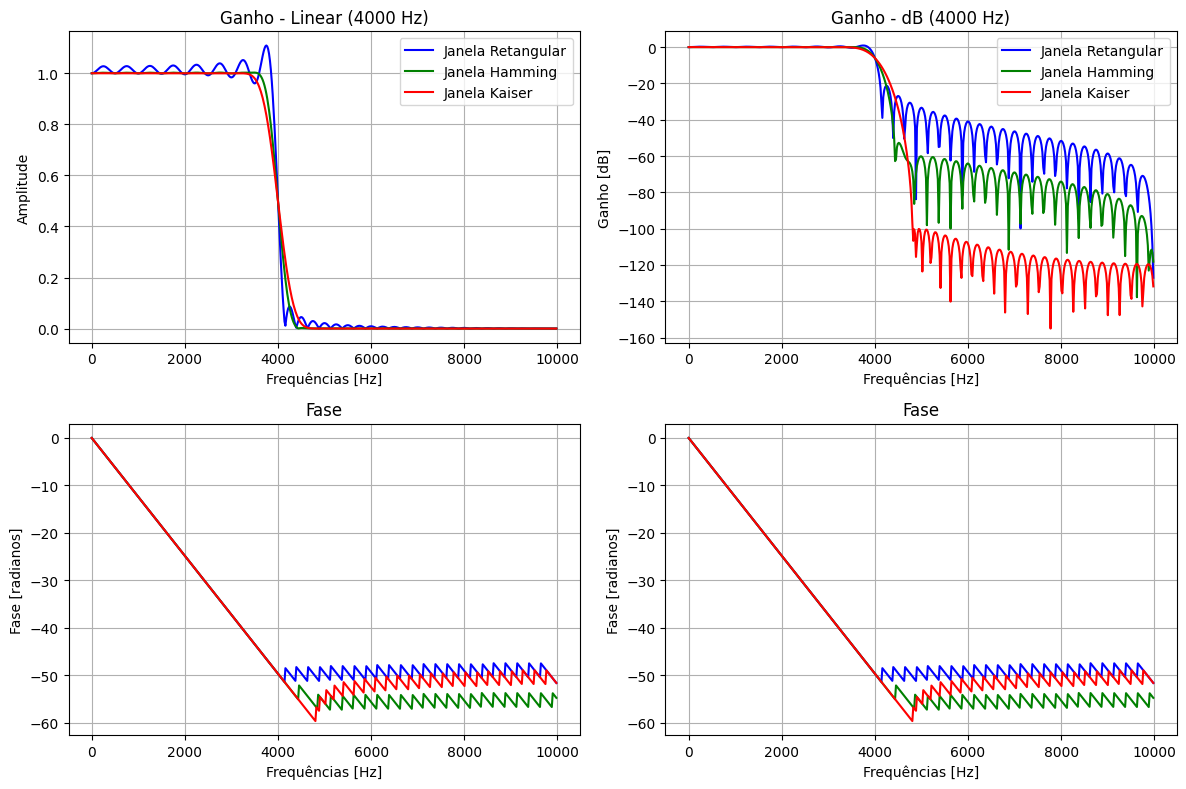

In [11]:
# Parâmetros
numtaps = 80  # Número de coeficientes (tamanho do filtro)
fs = 20000  # Frequência de amostragem
cutoff = 4000 / (fs / 2)  # Frequência de corte normalizada (4000 Hz)

# Filtro FIR com janela retangular (boxcar)
a1 = signal.firwin(numtaps, cutoff, window='boxcar', pass_zero=True)
w, h1 = signal.freqz(a1)

# Filtro FIR com janela de Hamming
a2 = signal.firwin(numtaps, cutoff, window='hamming', pass_zero=True)
w, h2 = signal.freqz(a2)

# Filtro FIR com janela de Kaiser (beta = 8)
a3 = signal.firwin(numtaps, cutoff, window=('kaiser', 10), pass_zero=True)
w, h3 = signal.freqz(a3)

# Criação do gráfico com subplots para ganho linear e fase (lado esquerdo)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico de ganho (linear)
axs[0, 0].plot(w * fs / (2 * np.pi), abs(h1), 'b', label='Janela Retangular')
axs[0, 0].plot(w * fs / (2 * np.pi), abs(h2), 'g', label='Janela Hamming')
axs[0, 0].plot(w * fs / (2 * np.pi), abs(h3), 'r', label='Janela Kaiser')
axs[0, 0].set_title('Ganho - Linear (4000 Hz)')
axs[0, 0].set_ylabel('Amplitude')
axs[0, 0].set_xlabel('Frequências [Hz]')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Gráfico de fase (abaixo do gráfico linear)
axs[1, 0].plot(w * fs / (2 * np.pi), np.unwrap(np.angle(h1)), 'b', label='Janela Retangular')
axs[1, 0].plot(w * fs / (2 * np.pi), np.unwrap(np.angle(h2)), 'g', label='Janela Hamming')
axs[1, 0].plot(w * fs / (2 * np.pi), np.unwrap(np.angle(h3)), 'r', label='Janela Kaiser')
axs[1, 0].set_title('Fase')
axs[1, 0].set_ylabel('Fase [radianos]')
axs[1, 0].set_xlabel('Frequências [Hz]')
axs[1, 0].grid(True)

# Criação do gráfico com subplots para ganho em dB e fase (lado direito)
# Gráfico de ganho (em dB)
axs[0, 1].plot(w * fs / (2 * np.pi), 20 * np.log10(abs(h1)), 'b', label='Janela Retangular')
axs[0, 1].plot(w * fs / (2 * np.pi), 20 * np.log10(abs(h2)), 'g', label='Janela Hamming')
axs[0, 1].plot(w * fs / (2 * np.pi), 20 * np.log10(abs(h3)), 'r', label='Janela Kaiser')
axs[0, 1].set_title('Ganho - dB (4000 Hz)')
axs[0, 1].set_ylabel('Ganho [dB]')
axs[0, 1].set_xlabel('Frequências [Hz]')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Gráfico de fase (abaixo do gráfico em dB)
axs[1, 1].plot(w * fs / (2 * np.pi), np.unwrap(np.angle(h1)), 'b', label='Janela Retangular')
axs[1, 1].plot(w * fs / (2 * np.pi), np.unwrap(np.angle(h2)), 'g', label='Janela Hamming')
axs[1, 1].plot(w * fs / (2 * np.pi), np.unwrap(np.angle(h3)), 'r', label='Janela Kaiser')
axs[1, 1].set_title('Fase')
axs[1, 1].set_ylabel('Fase [radianos]')
axs[1, 1].set_xlabel('Frequências [Hz]')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()
